In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.read_csv("/content/housing.csv")

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
housing.info()
housing.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

(20640, 13)

In [7]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

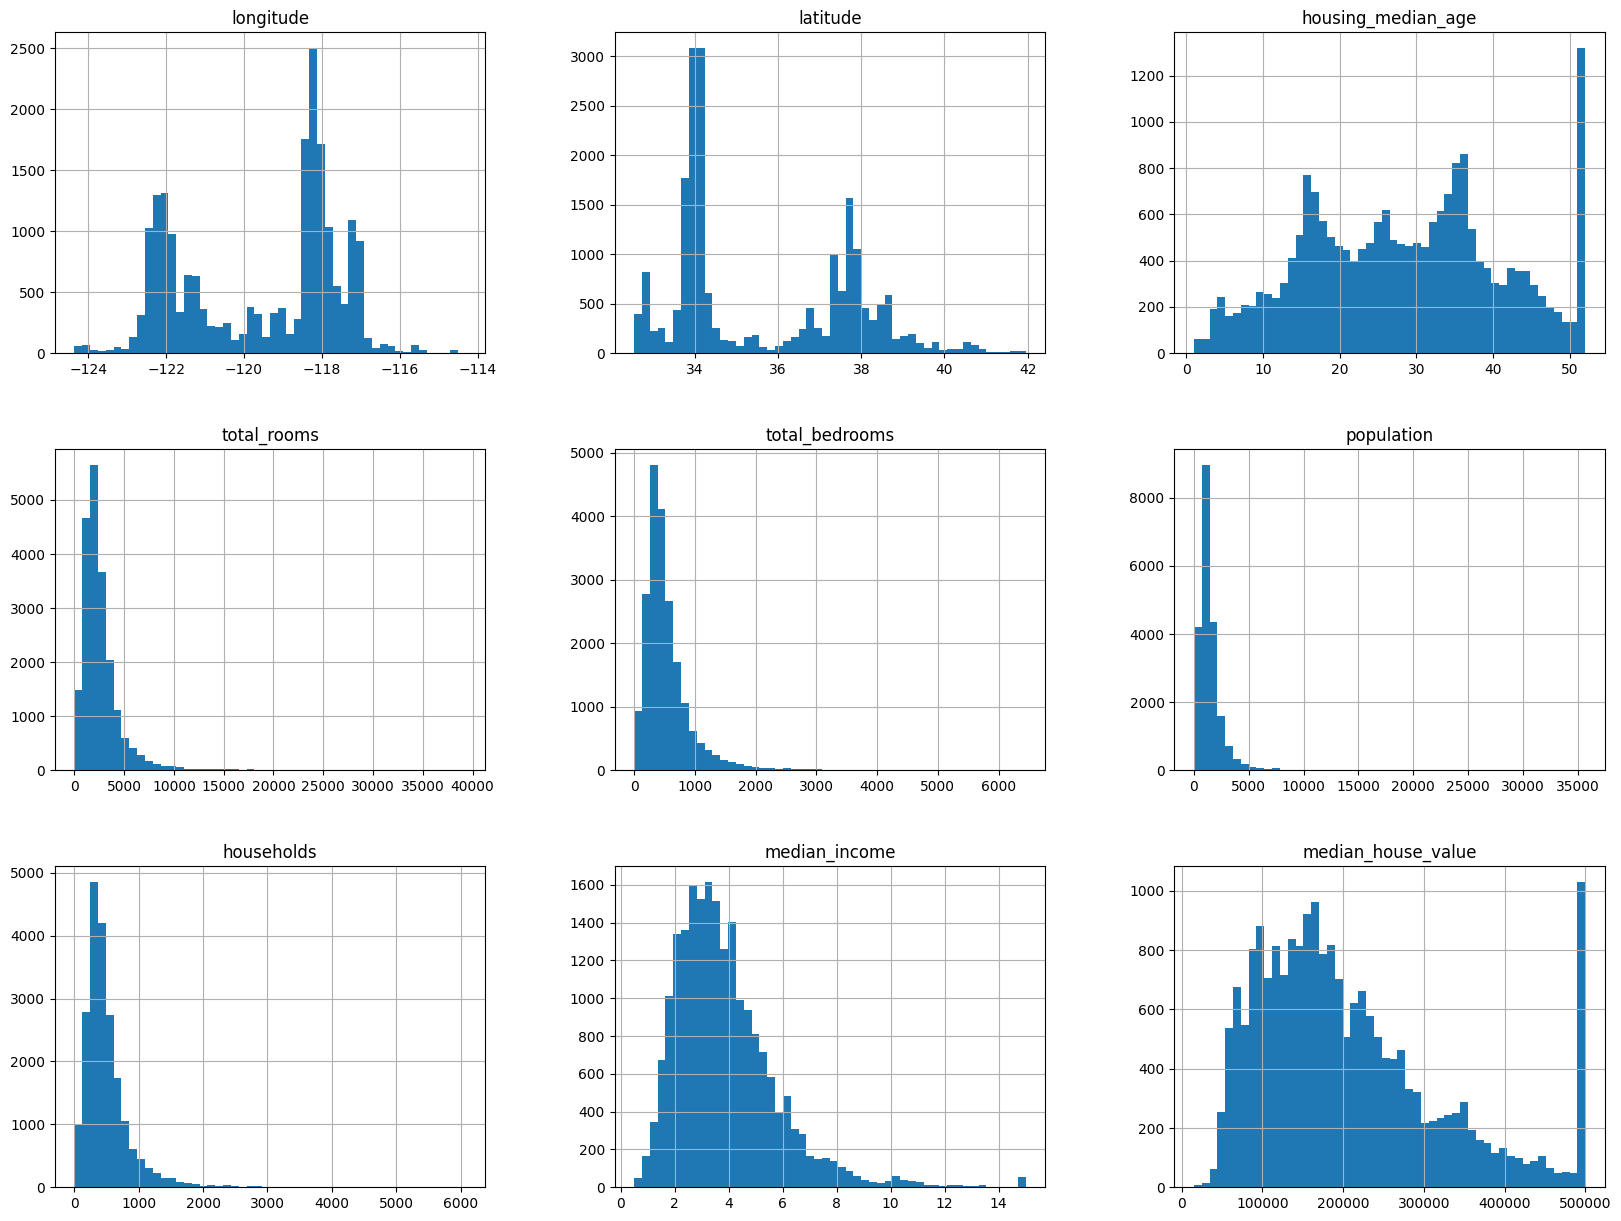

In [9]:
housing.hist(bins=50, figsize = (20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

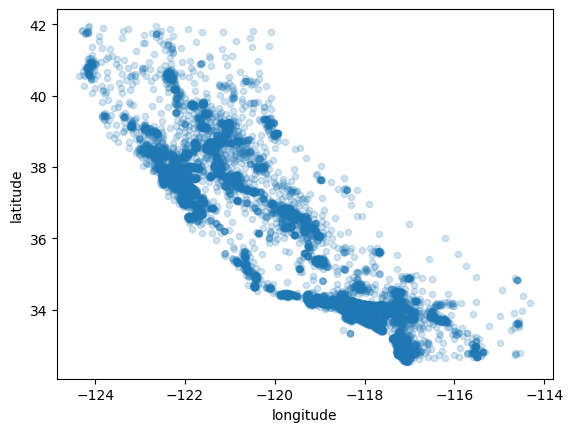

In [10]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha = 0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

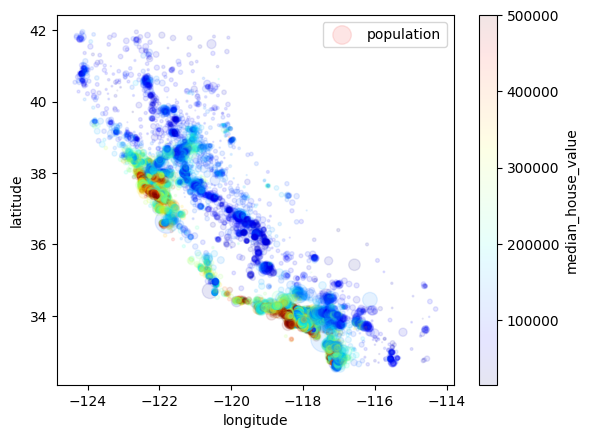

In [11]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha = 0.1,s=housing["population"]/100,label = "population",c="median_house_value",cmap = plt.get_cmap("jet"))

In [12]:
# Convert 'ocean_proximity' to numerical representation using one-hot encoding
housing = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True)

# Calculate the correlation matrix
housing.corr()
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.006463,-0.004361,-0.019873,0.000679
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006463,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163


In [13]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
ocean_proximity_NEAR BAY,0.160284
ocean_proximity_NEAR OCEAN,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023416
population,-0.024650


In [16]:
housing_na=housing.dropna(subset=["total_bedrooms"])

In [17]:
housing_na.shape

(20433, 13)

In [56]:

dummies = housing_na[[ 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

dummies = pd.get_dummies(housing_na[[ 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']])


In [21]:
dummies

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
20635,True,False,False,False
20636,True,False,False,False
20637,True,False,False,False
20638,True,False,False,False


In [22]:
housing_na_dummies = pd.concat([housing_na,dummies],axis = "columns")
housing_na_dummies.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,False,False,True,False


In [24]:

housing_clean = housing_na_dummies.copy()

X = housing_clean.drop(columns=["median_house_value"])
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False,False,False,True,False


In [26]:
Y = housing_clean["median_house_value"]
Y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1984)

In [28]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()

OLS.fit(X_train,Y_train)

LinearRegression()

In [32]:
#display the intercept and coefficients of the ols model
print("Intercept is :"+str(OLS.intercept_))
print("The coeff is :"+str(OLS.coef_))
print("The R-Squared value is "+str(OLS.score(X_train,Y_train)))

Intercept is :-2295756.283784609
The coeff is :[-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.93753723e+04  7.45183940e+04 -1.42341472e+03  1.68159031e+03
 -1.93753723e+04  7.45183940e+04 -1.42341472e+03  1.68159031e+03]
The R-Squared value is 0.6433902949192565


In [39]:
# predicting with OLS
Y_pred=OLS.predict(X_test)
performance=pd.DataFrame({"Predictions":Y_pred,"Actual Values":Y_test})
performance['error'] = (performance["Actual Values"] - performance["Predictions"])
performance.head()


,Predictions,Actual Values,error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


In [40]:
#preparing data for plotting
performance.reset_index(drop = True,inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,Predictions,Actual Values,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


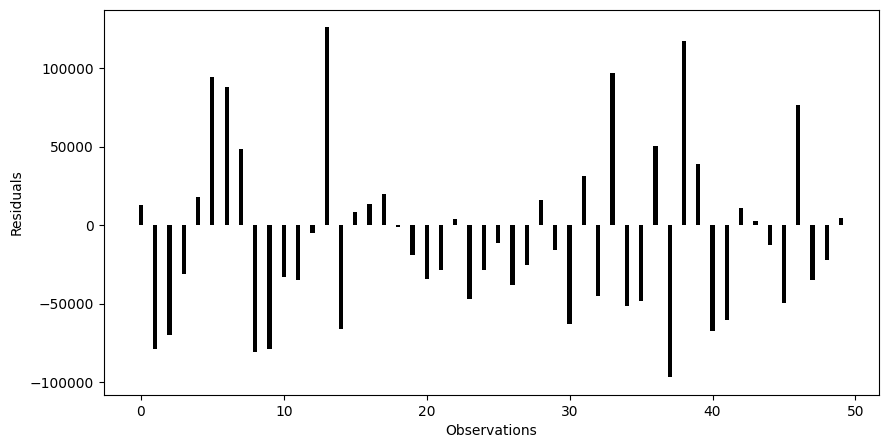

In [44]:
#plot the residuals
fig = plt.figure(figsize = (10,5))
plt.bar('index','error',data = performance[:50],color = 'black',width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")


plt.show()

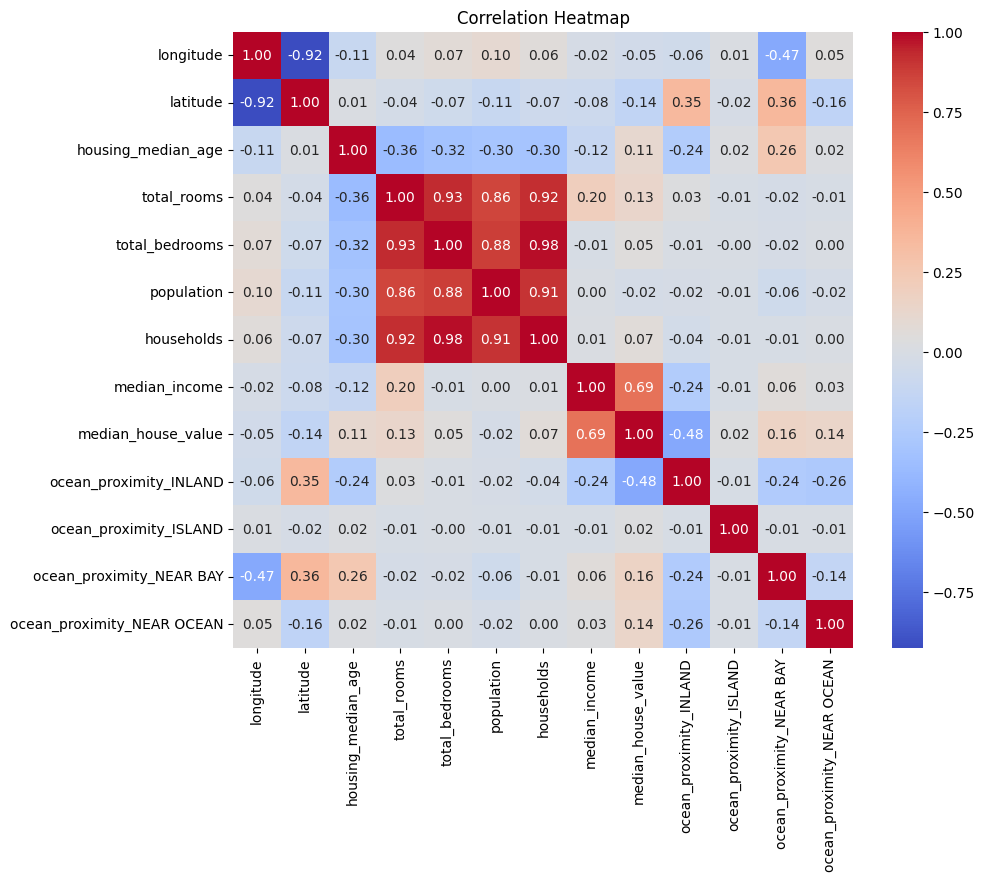

In [51]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


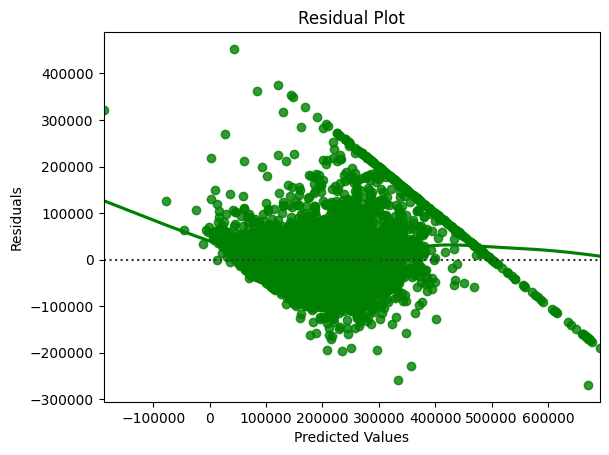

In [53]:
# Residual Distribution
sns.residplot(x=Y_pred, y=performance["error"], lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()



<ipython-input-55-60a2f90021dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


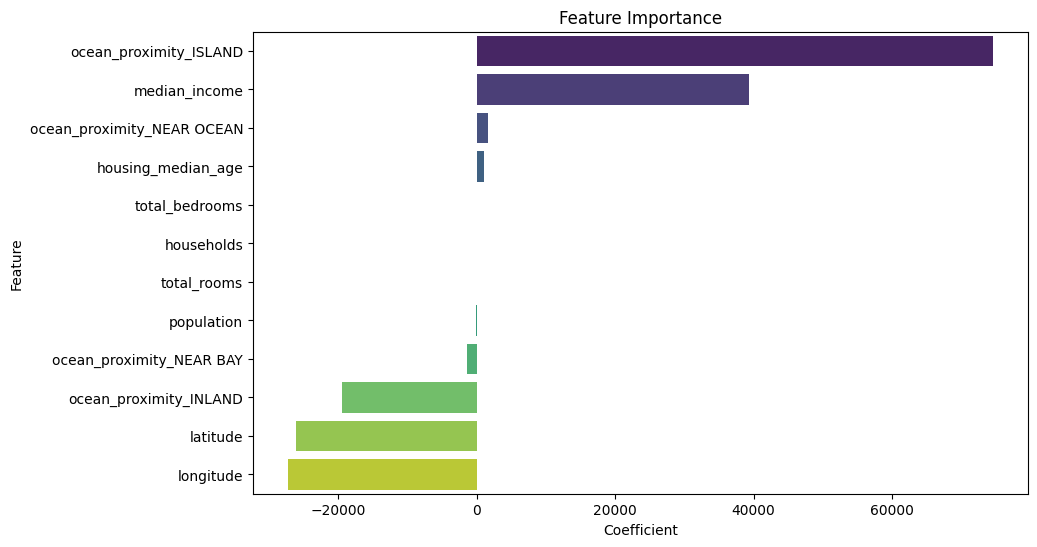

In [55]:
coef_df = pd.DataFrame({"Feature": X_train.columns[1:], "Coefficient": OLS.coef_}) # Skip the first column (constant)
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Feature Importance")
plt.show()
